In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as st
import statsmodels.tsa as ts

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline
plt.style.use("ggplot")
sns.set_context("talk")

## Question 3.8

In [3]:
df = pd.read_csv("data/module3_data_Identifying_ARMA.csv")

In [4]:
df.describe()

,et
count,500.000000
mean,-0.028460
std,0.982000
min,-3.106688
25%,-0.722506
50%,-0.025935
75%,0.620061
max,2.988090


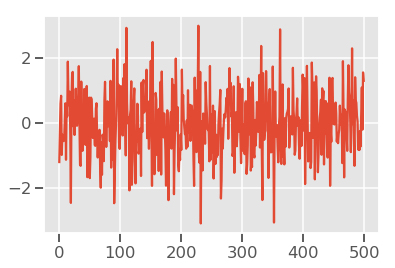

In [6]:
plt.plot(df.et)
plt.show()

In [9]:
df.head()

,et
0,-1.213866
1,-0.285460
2,0.590270
3,0.828546
4,-0.995426


## Question 3.9

Using et as the white noise disturbance, and assuming the initial value of y to be equal to zero generate a new random variable yar, which follows the following AR(1) process:

yt = 3.0 + 0.55 yt-1 + et

Enter the value of the 5th observation of variable yar (to three decimal places, without any rounding):

In [20]:
y = [0]
for i in range(1, 500):
    y.append(3+0.55*y[i-1]+df.et.iloc[i])
ar = pd.DataFrame(y)

In [22]:
ar.head()

,0
0,0.000000
1,2.714540
2,5.083267
3,6.624343
4,5.647963


## Question 3.10
Also using et as the white noise disturbance and again assuming that the initial value of y is equal to zero, generate the variable yma which follows the following MA(1) process:

yt = -2.5 + et + 0.70et-1

Enter the value of the 5th observation of variable yma (to three decimal places, without any rounding):

In [23]:
y = [0]
for i in range(1, 500):
    y.append(-2.5+df.et.iloc[i]+0.7*df.et.iloc[i-1])
ma = pd.DataFrame(y)
ma.head()

,0
0,0.000000
1,-3.635166
2,-2.109552
3,-1.258265
4,-2.915444


## Question 3.11

Based on the patterns of ACF and PACF observed in the past lecture for an AR(1) process, which of the following statements is true?

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


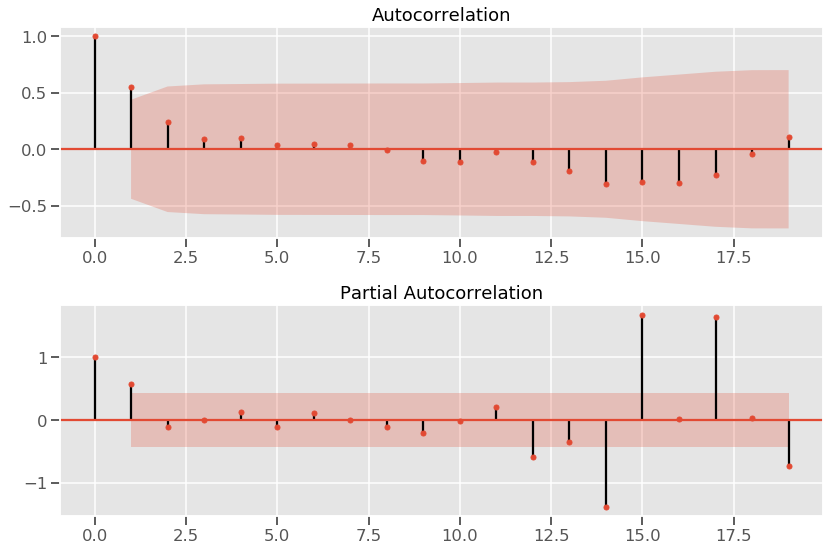

In [47]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))

plot_acf(ar[:20], ax = ax[0])
plot_pacf(ar[:20], ax = ax[1])
plt.tight_layout()
plt.show()

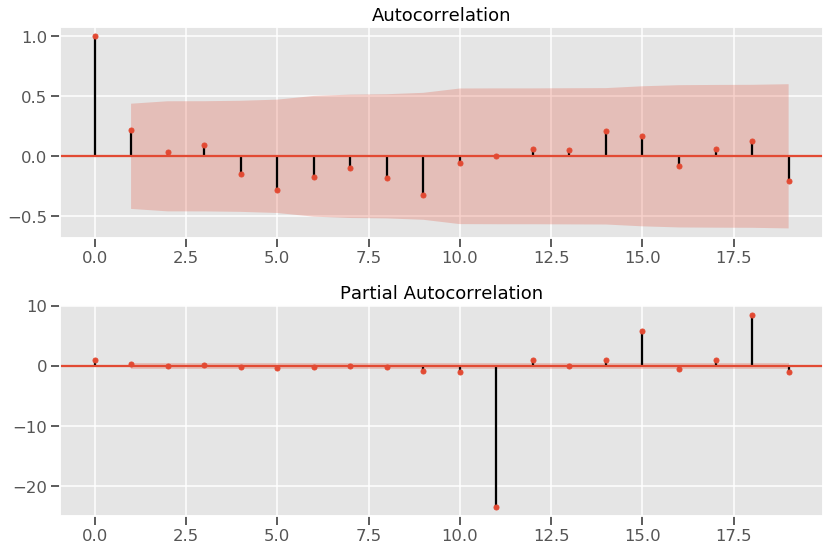

In [48]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))

plot_acf(ma[:20], ax = ax[0])
plot_pacf(ma[:20], ax = ax[1])
plt.tight_layout()
plt.show()

## Question 3.12

Lastly, also using et as the white noise disturbance and assuming that the initial value of y is equal to zero, generate variable yarma which follows an ARMA(1,1) process:

yt = 0.5 + 0.55yt-1 + et + 0.70et-1

Enter the value of the 5th observation of yarma (to three decimal places, without any rounding):

In [50]:
y = [0]
for i in range(1, 500):
    y.append(0.5+0.55*y[i-1]+df.et.iloc[i]+0.7*df.et.iloc[i-1])
arma = pd.DataFrame(y)
arma.head()

,0
0,0.000000
1,-0.635166
2,0.541107
3,2.039344
4,1.206196


## Question 3.13

Using EViews, compute the ACF at lags 1-20 for the four series: et and Variables yar,yma and yarma.

Enter the values (using 3 decimal places, without rounding) of the ACF at one lag for each series below:

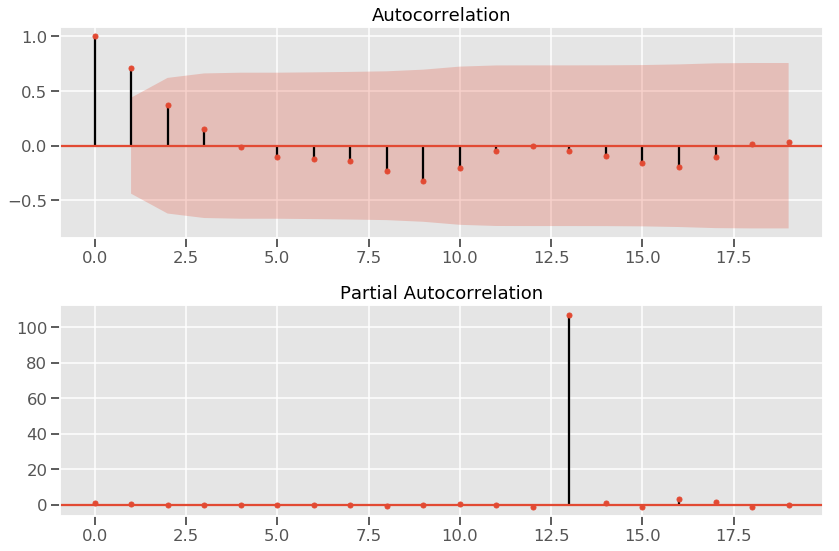

In [51]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))

plot_acf(arma[:20], ax = ax[0])
plot_pacf(arma[:20], ax = ax[1])
plt.tight_layout()
plt.show()

In [57]:
pd.DataFrame([ts.stattools.acf(df.et),
              ts.stattools.pacf(df.et),
              ts.stattools.acf(ar),
              ts.stattools.pacf(ar),
              ts.stattools.acf(ma),
              ts.stattools.pacf(ma),
              ts.stattools.acf(arma),
              ts.stattools.pacf(arma)
             ],
             index=["e_acf",
                    "e_pacf",
                    "ar_acf",
                    "ar_pacf",
                    "ma_acf",
                    "ma_pacf",
                    "arma_acf",
                    "arma_pacf"
                   ]
            ).T.head(20)

,e_acf,e_pacf,ar_acf,ar_pacf,ma_acf,ma_pacf,arma_acf,arma_pacf
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.023594,0.023641,0.521210,0.522255,0.426138,0.426992,0.726569,0.728025
2,-0.099056,-0.100069,0.206370,-0.090136,-0.101540,-0.347655,0.330865,-0.420928
3,-0.035888,-0.031485,0.101498,0.043281,-0.068151,0.192736,0.155564,0.308512
4,0.013577,0.005448,0.088785,0.044648,0.016686,-0.098503,0.107213,-0.151185
5,0.051095,0.044981,0.082768,0.023223,0.050354,0.107029,0.084684,0.108509
6,-0.001467,-0.002975,0.041493,-0.023010,0.008557,-0.086032,0.042258,-0.118035
7,-0.023221,-0.013609,0.007945,-0.009869,-0.028397,0.038946,0.002135,0.067002
8,-0.003434,-0.000108,-0.002512,-0.002472,-0.033987,-0.058222,-0.017059,-0.064260
9,-0.037518,-0.043278,-0.018883,-0.025816,-0.037287,-0.002448,-0.017943,0.046820


Consider the following three models that have been estimated for pe_ind (the stock market price-earnings ratio in India).

Model 1 is an AR(1); 
Model 2 has AR terms at lags 1 and 8 only;
Model 3 has AR terms at lags 1 and 8, and an MA term at lag 8.

For each model, the regression results and the ACF, PACF and Q-Statistics for the residuals are shown below:

## Question 3.20

Which model has the lowest Sum of Squared Residuals (SSR)?

In [84]:
df_pe = pd.read_csv("data/module3_data_PE_Ratios.csv")

In [85]:
ar = ts.arima_model.ARIMA(endog=df_pe.pe_ind, order=(1, 0, 0), missing="drop").fit()
ar.summary()

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 pe_ind   No. Observations:                  182
Model:                     ARMA(1, 0)   Log Likelihood                -311.138
Method:                       css-mle   S.D. of innovations              1.331
Date:                Thu, 07 Nov 2019   AIC                            628.276
Time:                        16:53:36   BIC                            637.888
Sample:                             0   HQIC                           632.173
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           17.3198      1.019     16.998      0.000      15.323      19.317
ar.L1.pe_ind     0.9079      0.030     30.223      0.000       0.849       0.967
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1014           +0.0000j            1.1014            0.0000
-----------------------------------------------------------------------------
"""

In [94]:
st.diagnostic.acorr_ljungbox(ar.resid)

(array([ 1.97958632,  1.99696074,  2.00550771,  2.02633269,  2.46289892,
         4.83156719,  5.17426507, 14.34508106, 14.80826028, 15.13254478,
        15.95802307, 15.9660261 , 16.00478434, 18.09235257, 18.17716208,
        18.31697917, 18.54284457, 19.08322555, 19.57415178, 19.72914719,
        19.73268373, 19.87787148, 20.28219143, 22.63800446, 22.6466019 ,
        23.53883281, 25.66089104, 25.93416729, 26.36153088, 28.68044963,
        28.89150507, 29.42803505, 29.49242927, 29.65463936, 29.71296846,
        29.85356627, 31.82167625, 32.22481134, 32.44273281, 36.8131937 ]),
 array([0.15943399, 0.36843891, 0.57126435, 0.73091539, 0.78207191,
        0.56559048, 0.63870623, 0.07320269, 0.09633918, 0.12730372,
        0.14269643, 0.19279709, 0.2488716 , 0.20260694, 0.25346622,
        0.30566483, 0.35539419, 0.38671537, 0.42059995, 0.47498342,
        0.53824533, 0.59067903, 0.62483425, 0.5412427 , 0.59819108,
        0.60231696, 0.53747606, 0.57666333, 0.60610998, 0.53442561,
      

## Question 3.25

Note that the series y was simulated following the model (where the error term is a white noise):

yt = 1.2yt-1 -0.5yt-2 +et

Plot the series by double clicking on y and then View->Graph. Based on the equation above, series y is simulated as what of process?

In [74]:
df_arma = pd.read_csv("data/module3_data_Simulated_ARMA.csv")

In [75]:
df_arma.head()

,dateid01,dateid,y,z
0,1900-01-01,1900-01-31 23:59:59.999,0.000000,0.000000
1,1900-02-01,1900-02-28 23:59:59.999,0.000000,-0.698508
2,1900-03-01,1900-03-31 23:59:59.999,-0.142965,0.290892
3,1900-04-01,1900-04-30 23:59:59.999,0.627469,0.418416
4,1900-05-01,1900-05-31 23:59:59.999,0.407678,2.434994


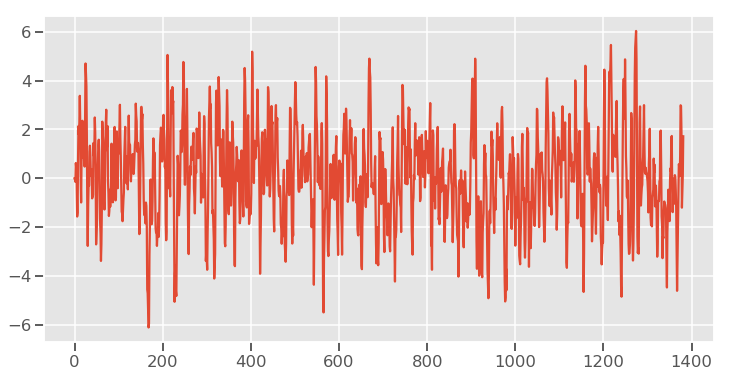

In [78]:
plt.figure(figsize=(12,6))
plt.plot(df_arma.y)
plt.show()

## Question 3.26

Enter the SBC (Schwarz criterion) for each model (to three decimal places, without any rounding):

In [97]:
ar1 = ts.arima_model.ARIMA(endog=df_arma.y, order=(1, 0, 0)).fit()
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1382
Model:                     ARMA(1, 0)   Log Likelihood               -2133.221
Method:                       css-mle   S.D. of innovations              1.132
Date:                Thu, 07 Nov 2019   AIC                           4272.442
Time:                        17:00:08   BIC                           4288.135
Sample:                             0   HQIC                          4278.312
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0711      0.158      0.449      0.654      -0.239       0.382
ar.L1.y        0.8083      0.016     51.159      0.000       0.777       0.839
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2371           +0.0000j            1.2371            0.0000
-----------------------------------------------------------------------------
"""

In [82]:
4288.135/1382

3.1028473227206947

In [80]:
ar2 = ts.arima_model.ARIMA(endog=df_arma.y, order=(2, 0, 0)).fit()
ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1382
Model:                     ARMA(2, 0)   Log Likelihood               -1939.334
Method:                       css-mle   S.D. of innovations              0.984
Date:                Thu, 07 Nov 2019   AIC                           3886.669
Time:                        16:06:04   BIC                           3907.594
Sample:                             0   HQIC                          3894.496
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0692      0.093      0.747      0.455      -0.112       0.250
ar.L1.y        1.2087      0.023     51.716      0.000       1.163       1.254
ar.L2.y       -0.4946      0.023    -21.170      0.000      -0.540      -0.449
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2219           -0.7272j            1.4219           -0.0854
AR.2            1.2219           +0.7272j            1.4219            0.0854
-----------------------------------------------------------------------------
"""

In [83]:
3907.594/1382

2.8274920405209842

## Question 3.27

Enter the p-value (to three decimal places, without any rounding) for the lag 12 Q-test on the regression residuals for each model:

In [98]:
st.diagnostic.acorr_ljungbox(ar1.resid)

(array([222.00869244, 222.89680104, 297.23112342, 382.9535034 ,
        420.78181115, 434.26330142, 434.96157928, 434.96269258,
        436.273895  , 436.97149946, 437.13239117, 438.42152417,
        443.50400614, 444.78323815, 445.02784967, 446.40382469,
        450.97660533, 458.51596111, 461.18496801, 461.28325384,
        462.11666394, 465.78398232, 469.22527699, 471.68002294,
        472.53614526, 472.56751363, 472.85502152, 472.90676687,
        473.25753649, 473.51573843, 473.72221749, 473.80922879,
        474.89033325, 475.65860034, 479.32048717, 480.38103151,
        480.38105756, 481.13056393, 481.65300101, 481.65687141]),
 array([3.29796005e-50, 3.96802716e-49, 3.95387248e-64, 1.33992844e-81,
        9.82624424e-89, 1.19491979e-90, 7.52085400e-90, 6.15418583e-89,
        2.46165690e-88, 1.25404468e-87, 7.87347920e-87, 2.71067517e-86,
        1.40681700e-86, 4.50555063e-86, 2.30109617e-85, 6.55948766e-85,
        3.86841806e-85, 5.33279020e-86, 7.56422649e-86, 3.60992248e-85

In [99]:
st.diagnostic.acorr_ljungbox(ar2.resid)

(array([ 0.22881801,  0.23569045,  0.46521062,  0.47025152,  2.7822248 ,
         2.82780314,  4.15847134,  4.41378038,  5.19347105,  5.22743657,
         5.52512849,  5.52746935,  8.44410369,  8.55777309,  9.29310791,
         9.29531531,  9.55492291, 11.55991203, 12.04071559, 13.17782233,
        13.17866474, 14.71182711, 15.35701685, 16.30679831, 16.86969749,
        17.15352983, 17.2417439 , 17.8826151 , 18.94369308, 19.38225784,
        19.46813271, 19.57201702, 22.46964715, 22.52611181, 26.69199563,
        27.31639741, 28.01825672, 29.25360402, 29.562634  , 29.5646681 ]),
 array([0.63240165, 0.88883361, 0.92646524, 0.97633163, 0.73351663,
        0.8301283 , 0.76135445, 0.81799585, 0.81712722, 0.87547628,
        0.90309937, 0.93800745, 0.81351342, 0.85829465, 0.86169977,
        0.90075523, 0.92123036, 0.86910624, 0.88387761, 0.86962472,
        0.90223708, 0.87430528, 0.8813831 , 0.87668509, 0.88646552,
        0.90437141, 0.92498977, 0.92906741, 0.92272335, 0.93163959,
      

## Question 3.30

Which model was chosen as the best?

In [103]:
results = []
for p in range(1,7):
    for q in range(1,7):
        model = ts.arima_model.ARIMA(endog=df_arma.y, order=(p, 0, q)).fit()
        results.append([p, q, model.aic, model.bic])

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge

In [105]:
pd.DataFrame(results, columns=["p", "q", "aic", "bic"])

,p,q,aic,bic
0,1,1,3971.577334,3992.502482
1,1,2,3912.376923,3938.533358
2,1,3,3895.518780,3926.906502
3,1,4,3896.125008,3932.744017
4,1,5,3893.848067,3935.698363
5,1,6,3893.612667,3940.694250
6,2,1,3887.932150,3914.088585
7,2,2,3889.039058,3920.426780
8,2,3,3890.929806,3927.548815
9,2,4,3892.498663,3934.348960


## Question 3.32

After viewing the ACF and PACF, which of the following statistical processes appears to be more likely? Select only one option.

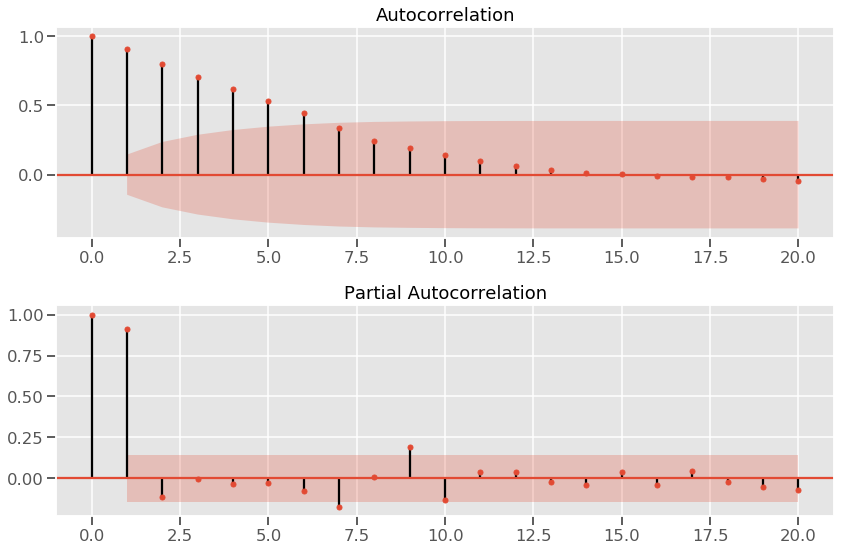

In [108]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))

plot_acf(df_pe.pe_ind.dropna(), lags=20, ax = ax[0])
plot_pacf(df_pe.pe_ind.dropna(), lags=20, ax = ax[1])
plt.tight_layout()
plt.show()

## Question 3.33

Which model was chosen?

In [112]:
results = []
for p in range(1,7):
    for q in range(0,7):
        model = ts.arima_model.ARIMA(df_pe.pe_ind.dropna(), order=(p, 0, q)).fit()
        results.append([p, q, model.aic, model.bic])

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels

LinAlgError: SVD did not converge

In [113]:
pd.DataFrame(results, columns=["p", "q", "aic", "bic"])

,p,q,aic,bic
0,1,0,628.276151,637.888171
1,1,1,628.098512,640.914539
2,1,2,630.051854,646.071887
3,1,3,631.998478,651.222518
4,1,4,633.947339,656.375386
5,1,5,635.547417,661.179470
6,1,6,630.350407,659.186467
7,2,0,628.040292,640.856319
8,2,1,629.215697,645.235731
9,2,2,630.701125,649.925165


## Identifying Non-Stationarity
Given two series mt and nt defined by the following equations:

mt= 1.5 + mt-1 + emt

nt= -2 + nt-1 + ent

where emt and ent are both white noise. Open the workfile Module3B_data.wf1 pagefile “Simulated_Nonstationary”. You are given the series em and en representing emt and ent respectively. Study the graphs of the series mt and nt.

Optional: You are encouraged to generate mt and nt where the initial values of mt and nt are zero (see Module 3A Question 3.9 for an example of how to generate the series). 

## Question 3.36

These two series, m and n, are stationary:

In [115]:
df_non_staionary = pd.read_csv("data/module3b_data_Simulated_Nonstationary.CSV")

In [117]:
df_non_staionary.shape

(500, 9)

In [119]:
df_non_staionary.head()

,dateid01,dateid,em,en,m,n,x,y,z
0,1973-07-01,1973-07-31 23:59:59.999,0.000000,0.000000,0.0,0,39.575176,15.113905,727.921639
1,1973-08-01,1973-08-31 23:59:59.999,0.211908,-1.455569,1.5,-2,38.962416,16.584622,729.480429
2,1973-09-01,1973-09-30 23:59:59.999,1.633812,0.379432,3.0,-4,37.219141,17.310910,727.280262
3,1973-10-01,1973-10-31 23:59:59.999,2.398119,0.342120,4.5,-6,35.104100,17.691245,729.819402
4,1973-11-01,1973-11-30 23:59:59.999,-0.023755,-1.083531,6.0,-8,33.766806,16.803657,727.948215


In [122]:
m = [0]
for i in range(1, 500):
    m.append(1.5+m[i-1]+df_non_staionary.em[i])
    
n = [0]
for i in range(1, 500):
    n.append(-2+n[i-1]+df_non_staionary.en[i])

In [125]:
df_mn = pd.DataFrame([m, n], index=["m", 'n']).T

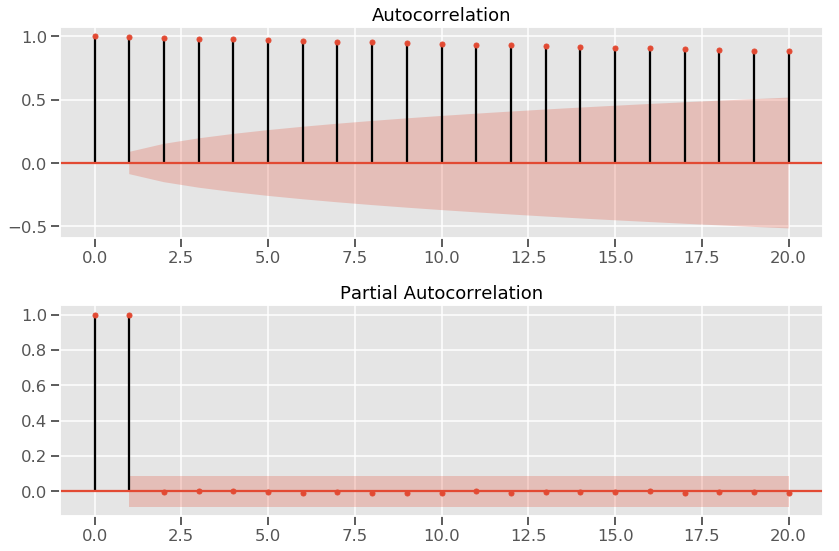

In [126]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))

plot_acf(df_mn.m, lags=20, ax = ax[0])
plot_pacf(df_mn.m, lags=20, ax = ax[1])
plt.tight_layout()
plt.show()

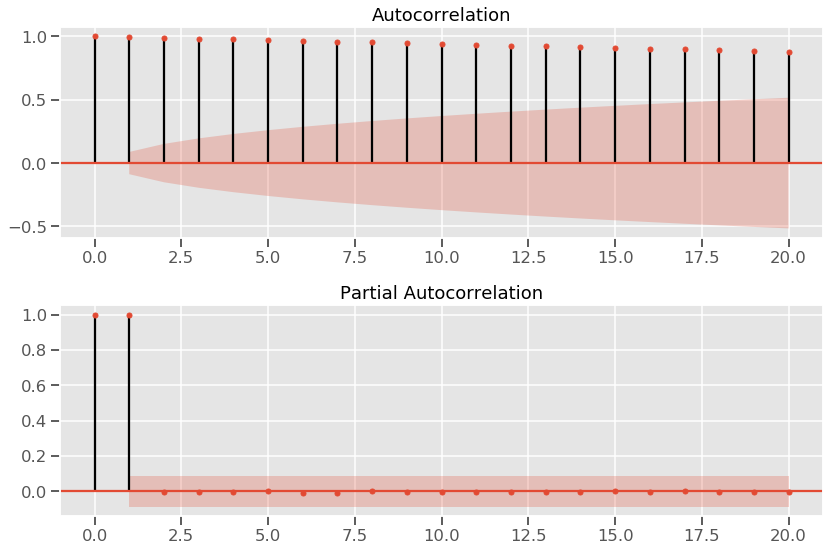

In [127]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))

plot_acf(df_mn.n, lags=20, ax = ax[0])
plot_pacf(df_mn.n, lags=20, ax = ax[1])
plt.tight_layout()
plt.show()

## Question 3.38

Estimate an AR(1) model for m and then for n (Hint: run the command ls m c ar(1) to estimate the AR(1) model for variable 'm'). Enter the corresponding estimated autoregressive coefficient (to four decimal places, without any rounding):

In [129]:
model = ts.arima_model.ARIMA(endog=df_mn.m, order=(1, 0, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      m   No. Observations:                  500
Model:                     ARMA(1, 0)   Log Likelihood                -984.515
Method:                       css-mle   S.D. of innovations              1.715
Date:                Fri, 08 Nov 2019   AIC                           1975.031
Time:                        09:58:05   BIC                           1987.675
Sample:                             0   HQIC                          1979.992
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        351.0266    347.928      1.009      0.314    -330.900    1032.953
ar.L1.m        1.0000   1.78e-05   5.62e+04      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [130]:
model = ts.arima_model.ARIMA(endog=df_mn.n, order=(1, 0, 0)).fit()
model.summary()

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      n   No. Observations:                  500
Model:                     ARMA(1, 0)   Log Likelihood               -1115.213
Method:                       css-mle   S.D. of innovations              2.217
Date:                Fri, 08 Nov 2019   AIC                           2236.425
Time:                        09:58:13   BIC                           2249.069
Sample:                             0   HQIC                          2241.387
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5676.2604      0.087  -6.51e+04      0.000   -5676.431   -5676.089
ar.L1.n        1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

## Question 3.39

Run a regression of m on n , together with a constant term. Which of the following statements accurately represents the regression results? (Choose all that apply) (Optional question)

In [134]:
df_mn["const"] = 1

In [137]:
model = sm.OLS(endog=df_mn.m, 
               exog=df_mn.loc[:, ["m", "const"]]
              ).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.785e+32
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:12:53   Log-Likelihood:                 13756.
No. Observations:                 500   AIC:                        -2.751e+04
Df Residuals:                     498   BIC:                        -2.750e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
m              1.0000   5.99e-17   1.67e+16      0.000       1.000       1.000
const      -9.859e-14   2.48e-14     -3.975      0.000   -1.47e-13   -4.99e-14
==============================================================================
Omnibus:                      251.531   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.618
Skew:                           0.060   Prob(JB):                     6.10e-07
Kurtosis:                       1.834   Cond. No.                         840.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

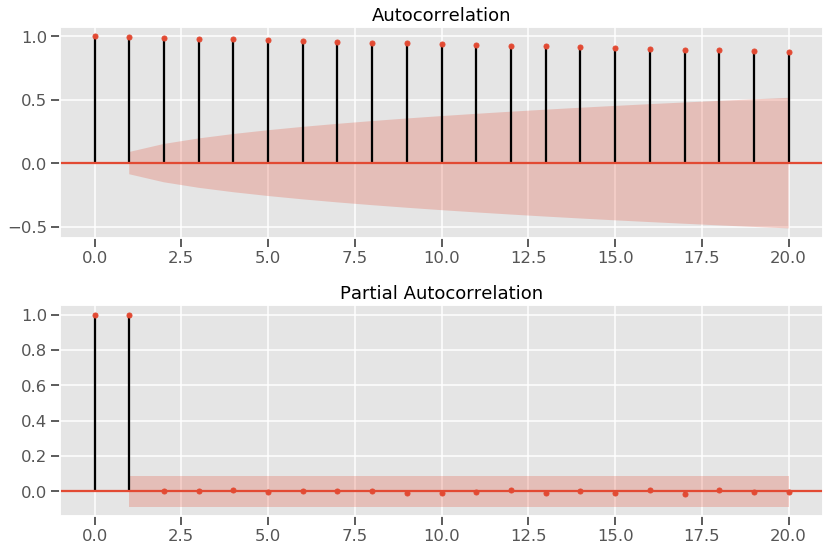

In [139]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))

plot_acf(model.resid, lags=20, ax = ax[0])
plot_pacf(model.resid, lags=20, ax = ax[1])
plt.tight_layout()
plt.show()

## Stationary or Nonstationary?

## Question 3.40

Given that in both cases the coefficient on the trend term is not statistically significant, using a 10 percent level of significance, the test results suggest that pe_ind is (see the results in the table above):

In [144]:
ts.stattools.adfuller(df_pe.pe_ind.dropna())

(-2.8058176866448545,
 0.05744754628177443,
 0,
 181,
 {'1%': -3.467004502498507,
  '5%': -2.8776444997243558,
  '10%': -2.575355189707274},
 536.4630212977505)

In [145]:
ts.stattools.adfuller(df_pe.pe_ind.dropna(), regression="ct")

(-2.9567389453201214,
 0.1445801348266556,
 0,
 181,
 {'1%': -4.0096774902428285,
  '5%': -3.435029821283931,
  '10%': -3.1414586641558206},
 536.7354687172152)

## Question 3.41

Run the KPSS test for pe_ind (see question 3.40 and replace “adf” with “kpss” in the command options of uroot). Based on the result, the variable pe_ind is (Hint: If the KPSS statistic is smaller than the x% level critical value then one cannot reject the null-hypothesis at the x% level and recall that the null hypothesis is that pe_ind is stationary):

Using a 10 percent level of significance, the KPSS test implies that pe_ind is:

In [146]:
ts.stattools.kpss(df_pe.pe_ind.dropna())

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.23081599999254485,
 0.1,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [147]:
ts.stattools.kpss(df_pe.pe_ind.dropna(), regression="ct")

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.08025239419300374,
 0.1,
 14,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

## Running Different Tests
Open the EViews workfile “Module3B_data.wf1”, pagefile “Simulated_full_sample”. 

During the video lecture, we conducted tests on three simulated series: y (a near-unit root series), z (a random walk) and x (a trend stationary series). Using the full sample of data (1,382 observations), the goal of this section is to ascertain that z is I(1) by running the three tests (ADF, PP, and KPSS) on its first-difference.

Hint: You can ensure that use the full sample (i.e., 1382 observations) by issuing the command smpl @all before you calculate the required statistics.

## Question 3.42

For the first difference of z, do the ADF or PP tests fail to reject the null hypothesis of a unit root for any of the specifications (constant/constant and trend)?

Hint: Please note that by adding the option “dif=1” in the uroot command, EViews runs the test for the first difference of the variable e.g. z.uroot(adf,exog=trend,dif=1) for the ADF test of z with a constant and a trend (with a constant only replace "exog=trend" with "exog=const"). You can change the “adf” option to “pp” to produce the PP tests.

In [150]:
df_simulated_sample = pd.read_csv("data/module3b_data_Simulated_full_sample.csv")

In [151]:
df_simulated_sample.head()

,dateid01,dateid,x,y,z
0,1900-01-01,1900-01-31 23:59:59.999,0.000000,0.000000,0.000000
1,1900-02-01,1900-02-28 23:59:59.999,2.644404,-0.723371,2.538293
2,1900-03-01,1900-03-31 23:59:59.999,3.439934,2.142096,2.227375
3,1900-04-01,1900-04-30 23:59:59.999,3.615788,4.493112,4.767550
4,1900-05-01,1900-05-31 23:59:59.999,4.764565,5.088569,4.051969


In [152]:
df_simulated_sample["z_diff"] = df_simulated_sample.z.diff()

In [153]:
df_simulated_sample.head()

,dateid01,dateid,x,y,z,z_diff
0,1900-01-01,1900-01-31 23:59:59.999,0.000000,0.000000,0.000000,NaN
1,1900-02-01,1900-02-28 23:59:59.999,2.644404,-0.723371,2.538293,2.538293
2,1900-03-01,1900-03-31 23:59:59.999,3.439934,2.142096,2.227375,-0.310919
3,1900-04-01,1900-04-30 23:59:59.999,3.615788,4.493112,4.767550,2.540175
4,1900-05-01,1900-05-31 23:59:59.999,4.764565,5.088569,4.051969,-0.715581


In [154]:
ts.stattools.adfuller(df_simulated_sample.z_diff.dropna())

(-37.26201076756311,
 0.0,
 0,
 1380,
 {'1%': -3.435097467737946,
  '5%': -2.8636366587977804,
  '10%': -2.5678862576139467},
 6325.677899539061)

In [155]:
ts.stattools.adfuller(df_simulated_sample.z_diff.dropna(), regression="ct")

(-37.250519729633645,
 0.0,
 0,
 1380,
 {'1%': -3.9653451959744634,
  '5%': -3.4136762113420027,
  '10%': -3.1289256927207476},
 6327.67781323692)

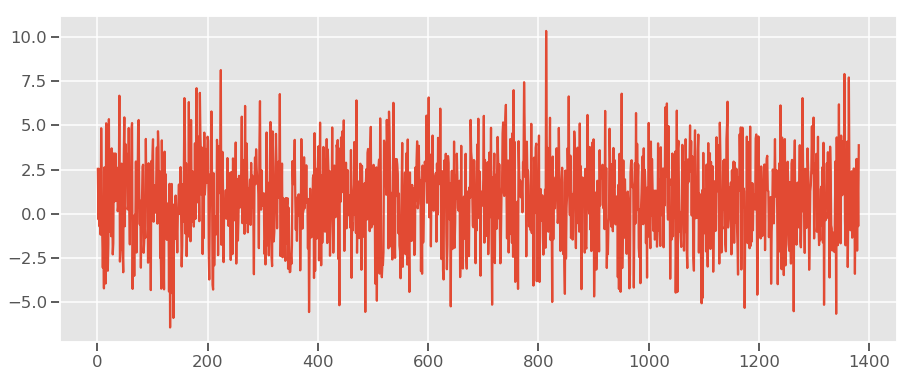

In [158]:
plt.figure(figsize=(15,6))
plt.plot(df_simulated_sample.z_diff)

## Question 3.43

Do both specifications of the KPSS test yield results consistent with those of the ADF and PP tests?

In [159]:
ts.stattools.kpss(df_simulated_sample.z_diff.dropna())

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.0360782162918628,
 0.1,
 24,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [160]:
ts.stattools.kpss(df_simulated_sample.z_diff.dropna(), regression="ct")

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.0327667355343489,
 0.1,
 24,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

## Comprehensive Tests and Specification

Open the series “pe_aus”, the price-earnings ratio for Australia. For the sample period 2000M4 - 2015M2, conduct the three unit root/stationarity tests covered in the lecture (ADF, PP, and KPSS) for all specifications (Intercept, Intercept and Trend, and None), using the AIC to determine the maximum lag included. Hint: As in previous questions adapt the command pe_aus.uroot(adf,exog=trend,lagmethod=aic) where we added the option “lagmethod=aic” to make sure EViews uses the Aikeke criterion instead of the Schwarz criterion to determine the number of lags in the test. Also, make sure you change the sample before running the test.

Enter the p-values of your results in the corresponding yellow shaded area in the Excel file. Note that the p-values for the KPSS test should be included as ranges, such “p>0.10”, “0.01<p<0.05”, etc.

In [177]:
df_pe.head()

,dateid01,dateid,date,pe_aus,pe_ind,pe_ndo,pe_saf,pe_usa
0,1954-02-01,1954-02-28 23:59:59.999,1954-02-26,NaN,NaN,NaN,NaN,9.92
1,1954-03-01,1954-03-31 23:59:59.999,1954-03-31,NaN,NaN,NaN,NaN,10.17
2,1954-04-01,1954-04-30 23:59:59.999,1954-04-30,NaN,NaN,NaN,NaN,10.57
3,1954-05-01,1954-05-31 23:59:59.999,1954-05-31,NaN,NaN,NaN,NaN,11.00
4,1954-06-01,1954-06-30 23:59:59.999,1954-06-30,NaN,NaN,NaN,NaN,11.08


In [173]:
df_pe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 8 columns):
dateid01    733 non-null object
dateid      733 non-null object
date        733 non-null object
pe_aus      179 non-null float64
pe_ind      182 non-null float64
pe_ndo      244 non-null float64
pe_saf      234 non-null float64
pe_usa      733 non-null float64
dtypes: float64(5), object(3)
memory usage: 45.9+ KB


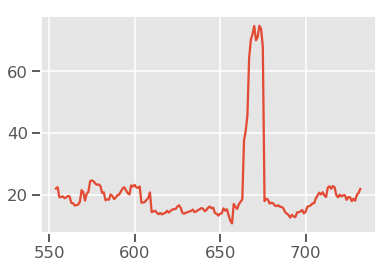

In [175]:
plt.plot(df_pe.pe_aus.dropna())

## Question 3.44

Which of the specifications appears to be most appropriate? Hint: Check the significance of the intercept and the trend terms in the regressions associated with the tests.

In [164]:
ts.stattools.adfuller(df_pe.pe_aus.dropna())

(-4.161024975834389,
 0.0007664687956573181,
 6,
 172,
 {'1%': -3.468952197801766,
  '5%': -2.878495056473015,
  '10%': -2.57580913601947},
 966.9137524339865)

In [165]:
ts.stattools.adfuller(df_pe.pe_aus.dropna(), regression="ct")

(-4.173755495882388,
 0.004903077228050376,
 6,
 172,
 {'1%': -4.012391591770221,
  '5%': -3.436329933826581,
  '10%': -3.1422196294037006},
 968.7634763553185)

In [166]:
ts.stattools.adfuller(df_pe.pe_aus.dropna(), regression="nc")

(-1.4571945107694397,
 0.135597918878207,
 1,
 177,
 {'1%': -2.5784874097481567,
  '5%': -1.9426192919936818,
  '10%': -1.6154014900113305},
 971.8707442836811)

## Question 3.46

Note: See Module 7 for a more detailed treatment of structural breaks.

However, there may be a structural break in the series that is distorting the tests. Based on the graph of pe_aus, when is the structural break likely to occur?

In [178]:
df_pe.loc[df_pe.pe_aus>30]

,dateid01,dateid,date,pe_aus,pe_ind,pe_ndo,pe_saf,pe_usa
664,2009-06-01,2009-06-30 23:59:59.999,2009-06-30,37.5461,19.7442,9.88,14.9970,17.2707
665,2009-07-01,2009-07-31 23:59:59.999,2009-07-31,40.7591,21.3468,11.11,16.1822,18.5572
666,2009-08-01,2009-08-31 23:59:59.999,2009-08-31,45.7962,21.3707,15.42,16.6356,20.3518
667,2009-09-01,2009-09-30 23:59:59.999,2009-09-30,64.4114,25.3197,14.23,18.2758,21.8572
668,2009-10-01,2009-10-31 23:59:59.999,2009-10-30,70.2688,23.4858,14.45,19.5080,21.6086
669,2009-11-01,2009-11-30 23:59:59.999,2009-11-30,72.1423,25.1387,14.89,19.9553,22.8008
670,2009-12-01,2009-12-31 23:59:59.999,2009-12-31,74.7402,24.0815,16.08,18.5224,18.4396
671,2010-01-01,2010-01-31 23:59:59.999,2010-01-29,70.1213,22.5613,14.98,17.8435,17.5271
672,2010-02-01,2010-02-28 23:59:59.999,2010-02-26,71.1663,22.6532,15.55,17.9095,17.9998
673,2010-03-01,2010-03-31 23:59:59.999,2010-03-31,74.8154,20.4873,15.38,19.0850,17.1505


## Pre-Crisis Tests
Repeat the unit root/stationarity tests, for the pre-Global Crisis period (from 2000:04 to 2009:05), and enter the p-values you obtain in the corresponding yellow-shaded cells in the Excel file.

## Question 3.47

Hint: See Q3.44

Which of the specifications appears to be most appropriate? (Optional question)


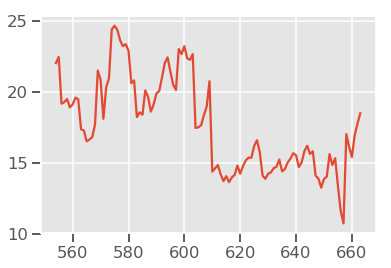

In [187]:
plt.plot(df_pe[554:664].pe_aus)

In [184]:
ts.stattools.adfuller(df_pe[554:664].pe_aus, regression="nc")

(-0.685056054544276,
 0.41890522140869846,
 0,
 109,
 {'1%': -2.586557203939062,
  '5%': -1.9437233356164225,
  '10%': -1.6145921490406778},
 351.71139923115027)

In [185]:
ts.stattools.adfuller(df_pe[554:664].pe_aus, regression="c")

(-2.5528935864350135,
 0.10312919227895206,
 0,
 109,
 {'1%': -3.49181775886872,
  '5%': -2.8884437992971588,
  '10%': -2.5811201893779985},
 349.05263416666867)

In [186]:
ts.stattools.adfuller(df_pe[554:664].pe_aus, regression="ct")

(-2.973899693677282,
 0.13952483839683344,
 0,
 109,
 {'1%': -4.044322283462378,
  '5%': -3.4515644781777084,
  '10%': -3.151118741781072},
 345.0883414769617)

## Breakpoint Unit Root Tests

First, note that you are testing for the level of the series. Since you found that there was a significant downward trend in the pre-crisis data, choose “Trend and Intercept” as the Basic Specification, and choose “Intercept” for the Breaking Specification. That is, you are assuming that the series has a trend and intercept, but only the intercept shifts with the break.
Choose “Akaike criterion” to choose the maximum lag length, and choose “Additive Outlier”, which treats the effects of the break as being immediate.
Choose “Dickey-Fuller min-t” as the criterion for finding the breakpoint. That is, EViews will look for a breakpoint that maximizes the probability that the ADF null hypothesis will be rejected, or equivalently, that the series will be stationary once the break is taken into account.
Lastly, please ensure that these tests are conducted over 2000:04-2015:02, that is, the full sample period.

## Question 3.49

Enter the breakpoint found by EViews (using the "2000M3" date format to provide your answer):

## Post-Crisis Tests
Lastly, please return to the three standard (i.e., non break point) unit tests that we started with in this question set. Calculate the three unit root/stationarity tests for just the post-Global Crisis period (i.e., 2010:12 – 2015:02).

Enter the resulting p-values in the corresponding yellow-shaded cells in the Excel file.

## Question 3.54

Which of the specifications is most appropriate?

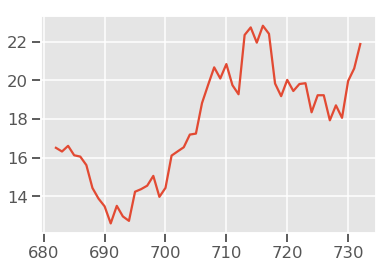

In [191]:
plt.plot(df_pe[682:].pe_aus)

In [192]:
ts.stattools.adfuller(df_pe[682:].pe_aus, regression="nc")

(0.6248305945687092,
 0.851991733322607,
 0,
 50,
 {'1%': -2.6119068, '5%': -1.947468216, '10%': -1.6123906879999998},
 116.68141718390171)

In [193]:
ts.stattools.adfuller(df_pe[682:].pe_aus, regression="c")

(-0.7982082657633057,
 0.8196478095105999,
 0,
 50,
 {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616},
 114.89481929190144)

In [194]:
ts.stattools.adfuller(df_pe[682:].pe_aus, regression="ct")

(-1.9641452819789407,
 0.6208211709741934,
 0,
 50,
 {'1%': -4.15227644, '5%': -3.5022753919999996, '10%': -3.1805110400000003},
 116.19569181088926)